In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [192]:
df = pd.read_csv('..\data\hottest_all.csv')
df = df[['Name', 'Artist', 'Release_year', 'Release_date', 'Popularity', 'Danceability', 'Energy', 'Loudness', 'Valence', 'Instrumentalness', 'Liveness', 'Speechiness', 'Acousticness', 'Tempo', 'Time_signature']]
df

,Name,Artist,Release_year,Release_date,Popularity,Danceability,Energy,Loudness,Valence,Instrumentalness,Liveness,Speechiness,Acousticness,Tempo,Time_signature
0,Hoops,The Rubens,2015,23/10/2015,0,0.738,0.517,-5.820,0.7720,0.000023,0.4680,0.0321,0.248000,96.037,4
1,King Kunta,Kendrick Lamar,2015,16/03/2015,72,0.884,0.657,-4.569,0.4890,0.000000,0.1540,0.0977,0.005890,107.059,4
2,Lean On (feat. MØ & DJ Snake),Major Lazer,2015,1/06/2015,0,0.723,0.809,-3.081,0.2740,0.001230,0.5650,0.0625,0.003460,98.007,4
3,The Less I Know The Better,Tame Impala,2015,17/07/2015,84,0.640,0.740,-4.083,0.7850,0.006780,0.1670,0.0284,0.011500,116.879,4
4,Let It Happen,Tame Impala,2015,17/07/2015,74,0.602,0.881,-5.875,0.5770,0.026600,0.1110,0.0443,0.004620,125.012,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,Germaphobe,Hockey Dad,2020,31/07/2020,48,0.470,0.954,-3.966,0.4120,0.000000,0.0971,0.0718,0.000785,127.980,4
589,Audacity (feat. Headie One),Stormzy,2020,13/12/2019,64,0.678,0.516,-4.601,0.1100,0.000000,0.1300,0.4440,0.052300,133.939,4
590,Your Man,Joji,2020,25/09/2020,68,0.785,0.818,-8.711,0.0503,0.149000,0.1490,0.0990,0.624000,117.980,4
591,Itch,Hockey Dad,2020,14/02/2020,43,0.253,0.791,-4.889,0.0808,0.000000,0.0957,0.0447,0.011900,159.916,4


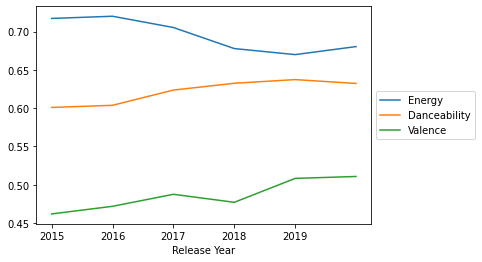

In [193]:
temp = df[['Release_year','Energy','Danceability','Valence']].groupby(by='Release_year').mean()
temp.plot.line()
plt.xlabel('Release Year')
plt.xticks(np.arange(2015,2020,1))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

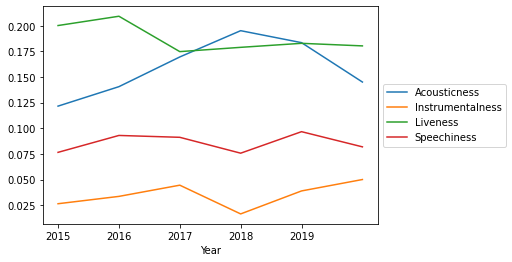

In [194]:
temp = df[['Release_year','Acousticness','Instrumentalness','Liveness','Speechiness']].groupby(by='Release_year').mean()
temp.plot.line()
plt.xlabel('Year')
plt.xticks(np.arange(2015,2020,1))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [195]:
df.describe()

,Release_year,Popularity,Danceability,Energy,Loudness,Valence,Instrumentalness,Liveness,Speechiness,Acousticness,Tempo,Time_signature
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000
mean,2017.507589,38.833052,0.621852,0.695051,-6.179373,0.486450,0.035163,0.187587,0.085929,0.159265,120.051642,3.973019
std,1.710567,28.768662,0.148473,0.164978,2.135307,0.213757,0.113964,0.143826,0.082291,0.206744,26.331002,0.207821
min,2015.000000,0.000000,0.146000,0.104000,-15.086000,0.035200,0.000000,0.020200,0.022100,0.000005,60.042000,3.000000
25%,2016.000000,0.000000,0.519000,0.583000,-7.284000,0.324000,0.000000,0.097100,0.037500,0.009880,99.970000,4.000000
50%,2018.000000,48.000000,0.632000,0.703000,-5.935000,0.493000,0.000026,0.127000,0.053200,0.066500,119.008000,4.000000
75%,2019.000000,61.000000,0.729000,0.829000,-4.729000,0.631000,0.004230,0.248000,0.096300,0.242000,136.046000,4.000000
max,2020.000000,91.000000,0.936000,0.992000,-1.148000,0.970000,0.863000,0.934000,0.567000,0.979000,210.164000,5.000000


In [196]:
X = df[['Energy', 'Valence']]

In [197]:
from sklearn import preprocessing 
scaler=preprocessing.MinMaxScaler()

In [198]:
features= X.values

In [199]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,21) #let's use elbow method to find out what the optimal k is 
for k in K:
    model = KMeans(n_clusters=k)
    model = model.fit(features)
    Sum_of_squared_distances.append(model.inertia_)
    print(f'Completed:{k}')

Completed:1
Completed:2
Completed:3
Completed:4
Completed:5
Completed:6
Completed:7
Completed:8
Completed:9
Completed:10
Completed:11
Completed:12
Completed:13
Completed:14
Completed:15
Completed:16
Completed:17
Completed:18
Completed:19
Completed:20


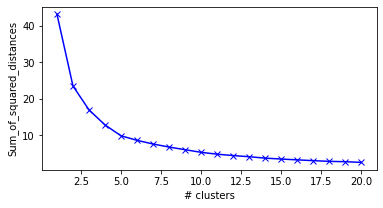

In [200]:
plt.figure(figsize=(6,3))
plt.plot(list(range(1,21)),Sum_of_squared_distances,'bx-')
plt.ylabel('Sum_of_squared_distances')
plt.xlabel('# clusters')
plt.show()

In [201]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=20)
model = model.fit(features)

In [202]:
predictions=model.predict(features)
df['cluster']=predictions
df

,Name,Artist,Release_year,Release_date,Popularity,Danceability,Energy,Loudness,Valence,Instrumentalness,Liveness,Speechiness,Acousticness,Tempo,Time_signature,cluster
0,Hoops,The Rubens,2015,23/10/2015,0,0.738,0.517,-5.820,0.7720,0.000023,0.4680,0.0321,0.248000,96.037,4,16
1,King Kunta,Kendrick Lamar,2015,16/03/2015,72,0.884,0.657,-4.569,0.4890,0.000000,0.1540,0.0977,0.005890,107.059,4,9
2,Lean On (feat. MØ & DJ Snake),Major Lazer,2015,1/06/2015,0,0.723,0.809,-3.081,0.2740,0.001230,0.5650,0.0625,0.003460,98.007,4,19
3,The Less I Know The Better,Tame Impala,2015,17/07/2015,84,0.640,0.740,-4.083,0.7850,0.006780,0.1670,0.0284,0.011500,116.879,4,17
4,Let It Happen,Tame Impala,2015,17/07/2015,74,0.602,0.881,-5.875,0.5770,0.026600,0.1110,0.0443,0.004620,125.012,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,Germaphobe,Hockey Dad,2020,31/07/2020,48,0.470,0.954,-3.966,0.4120,0.000000,0.0971,0.0718,0.000785,127.980,4,11
589,Audacity (feat. Headie One),Stormzy,2020,13/12/2019,64,0.678,0.516,-4.601,0.1100,0.000000,0.1300,0.4440,0.052300,133.939,4,1
590,Your Man,Joji,2020,25/09/2020,68,0.785,0.818,-8.711,0.0503,0.149000,0.1490,0.0990,0.624000,117.980,4,2
591,Itch,Hockey Dad,2020,14/02/2020,43,0.253,0.791,-4.889,0.0808,0.000000,0.0957,0.0447,0.011900,159.916,4,2


In [203]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=2)

In [204]:
pca_result = pca.fit_transform(features)

In [205]:
clusterdf=pd.DataFrame(pca_result)

In [206]:
clusterdf['cluster']=predictions

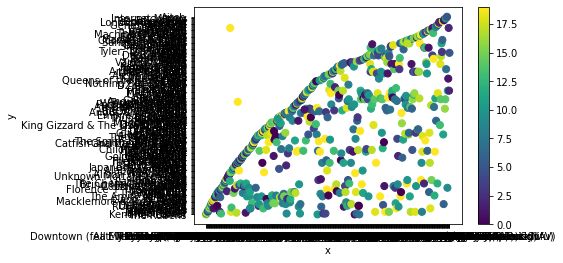

In [207]:
fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter(df.iloc[:,0].values, df.iloc[:,1].values,c=predictions,s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)

fig.show()

In [208]:
cluster2 = df[['Name', 'Artist', 'Release_date', 'Popularity', 'Danceability', 'Energy', 'Loudness', 'Valence']]

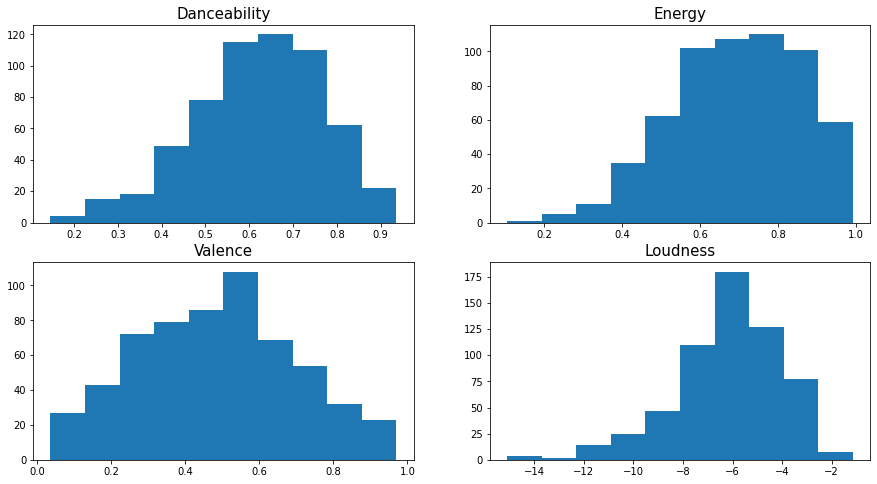

In [209]:
fig,axes = plt.subplots(2,2,figsize=(15,8))

axes[0,0].hist(df['Danceability'])
axes[0,0].set_title('Danceability',fontsize=15)
axes[0,1].hist(df['Energy'])
axes[0,1].set_title('Energy',fontsize=15)
axes[1,0].hist(df['Valence'])
axes[1,0].set_title('Valence',fontsize=15)
axes[1,1].hist(df['Loudness'])
axes[1,1].set_title('Loudness',fontsize=15)
plt.show()

In [210]:
col_features = cluster2.columns[5:]
X = MinMaxScaler().fit_transform(cluster2[col_features])

In [211]:
kmeans = KMeans(init="k-means++",n_clusters=2,random_state=15).fit(X)

In [212]:
cluster2['kmeans'] = kmeans.labels_

Text(0.5, 0.92, '3D Scatter Plot of Songs Clustered')

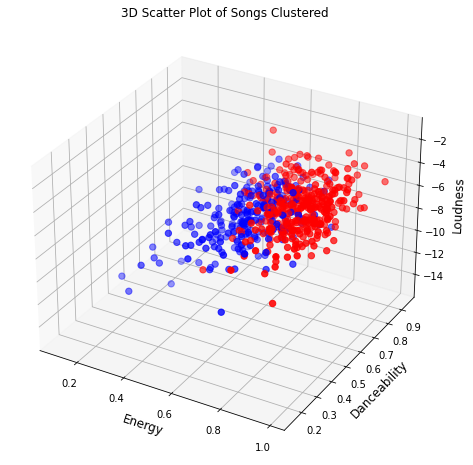

In [213]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = df['Energy']
y = df['Danceability']
z = df['Loudness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z,c=cluster2['kmeans'],s=40,cmap=cmhot)
ax.set_xlabel('Energy',fontsize=12)
ax.set_ylabel('Danceability',fontsize=12)
ax.set_zlabel('Loudness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")

In [214]:
cluster2.groupby(['kmeans']).mean()

,Popularity,Danceability,Energy,Loudness,Valence
kmeans,,,,,
0,40.962500,0.627829,0.560412,-7.619325,0.328918
1,37.385269,0.617788,0.786589,-5.200368,0.593554


In [215]:
cluster_2a = cluster2[cluster2['kmeans']==0]
cluster_2b  = cluster2[cluster2['kmeans']==1]

In [216]:
cluster3 = df[['Name', 'Artist', 'Release_year', 'Instrumentalness', 'Liveness', 'Speechiness', 'Acousticness']]

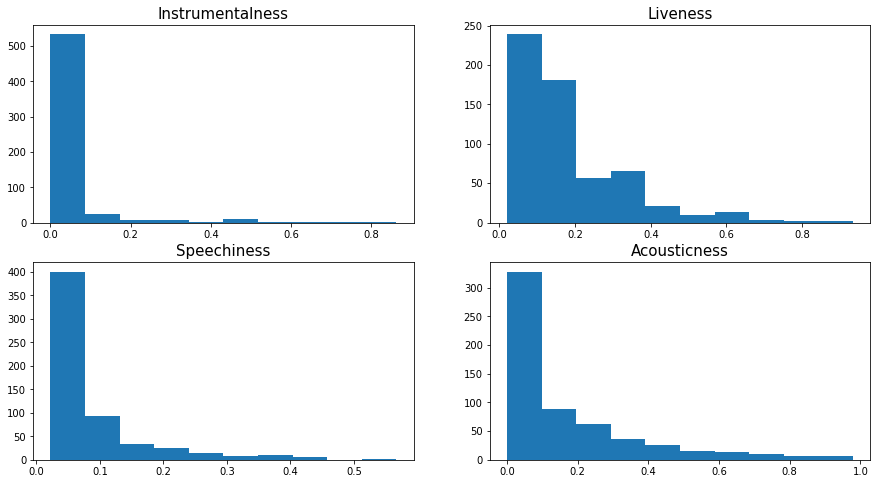

In [217]:
fig,axes = plt.subplots(2,2,figsize=(15,8))

axes[0,0].hist(df['Instrumentalness'])
axes[0,0].set_title('Instrumentalness',fontsize=15)
axes[0,1].hist(df['Liveness'])
axes[0,1].set_title('Liveness',fontsize=15)
axes[1,0].hist(df['Speechiness'])
axes[1,0].set_title('Speechiness',fontsize=15)
axes[1,1].hist(df['Acousticness'])
axes[1,1].set_title('Acousticness',fontsize=15)
plt.show()

In [218]:
col_features = cluster3.columns[4:]
X = MinMaxScaler().fit_transform(cluster3[col_features])

In [219]:
kmeans = KMeans(init="k-means++",n_clusters=2,random_state=15).fit(X)

In [220]:
cluster3['kmeans'] = kmeans.labels_

Text(0.5, 0.92, '3D Scatter Plot of Songs Clustered')

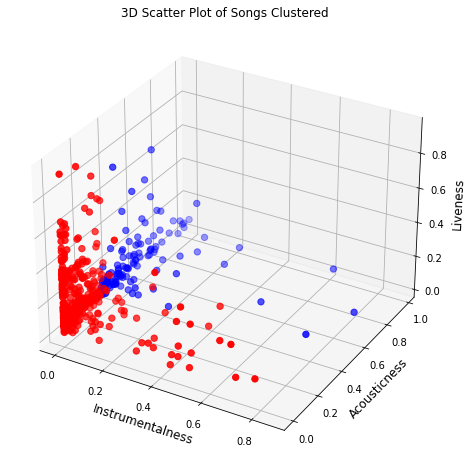

In [221]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = df['Instrumentalness']
y = df['Acousticness']
z = df['Liveness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z,c=cluster3['kmeans'],s=40,cmap=cmhot)
ax.set_xlabel('Instrumentalness',fontsize=12)
ax.set_ylabel('Acousticness',fontsize=12)
ax.set_zlabel('Liveness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")

In [222]:
cluster3.groupby(['kmeans']).mean()

,Release_year,Instrumentalness,Liveness,Speechiness,Acousticness
kmeans,,,,,
0,2017.653226,0.045843,0.154994,0.091639,0.500065
1,2017.469083,0.032340,0.196204,0.084420,0.069160


In [223]:
cluster_3a = cluster3[cluster3['kmeans']==0]
cluster_3b  = cluster3[cluster3['kmeans']==1]

In [244]:
cluster4 = pd.read_csv("..\data\hottest_all.csv")
cluster4 = df[['Name', 'Artist', 'Danceability', 'Energy', 'Loudness', 'Valence', 'Tempo']]
cluster4

,Name,Artist,Danceability,Energy,Loudness,Valence,Tempo
0,Hoops,The Rubens,0.738,0.517,-5.820,0.7720,96.037
1,King Kunta,Kendrick Lamar,0.884,0.657,-4.569,0.4890,107.059
2,Lean On (feat. MØ & DJ Snake),Major Lazer,0.723,0.809,-3.081,0.2740,98.007
3,The Less I Know The Better,Tame Impala,0.640,0.740,-4.083,0.7850,116.879
4,Let It Happen,Tame Impala,0.602,0.881,-5.875,0.5770,125.012
...,...,...,...,...,...,...,...
588,Germaphobe,Hockey Dad,0.470,0.954,-3.966,0.4120,127.980
589,Audacity (feat. Headie One),Stormzy,0.678,0.516,-4.601,0.1100,133.939
590,Your Man,Joji,0.785,0.818,-8.711,0.0503,117.980
591,Itch,Hockey Dad,0.253,0.791,-4.889,0.0808,159.916


In [245]:
features = cluster4.columns[2:]
data = cluster4[features]

In [246]:
clustering_kmeans = KMeans(n_clusters=4, precompute_distances="auto", n_jobs=-1)
data['clusters'] = clustering_kmeans.fit_predict(data)

In [247]:
data

,Danceability,Energy,Loudness,Valence,Tempo,clusters
0,0.738,0.517,-5.820,0.7720,96.037,0
1,0.884,0.657,-4.569,0.4890,107.059,2
2,0.723,0.809,-3.081,0.2740,98.007,0
3,0.640,0.740,-4.083,0.7850,116.879,2
4,0.602,0.881,-5.875,0.5770,125.012,2
...,...,...,...,...,...,...
588,0.470,0.954,-3.966,0.4120,127.980,2
589,0.678,0.516,-4.601,0.1100,133.939,1
590,0.785,0.818,-8.711,0.0503,117.980,2
591,0.253,0.791,-4.889,0.0808,159.916,1


In [248]:
kmeans = KMeans(init="k-means++",n_clusters=4,random_state=15).fit(X)
cluster4['kmeans'] = kmeans.labels_
cluster4

,Name,Artist,Danceability,Energy,Loudness,Valence,Tempo,kmeans
0,Hoops,The Rubens,0.738,0.517,-5.820,0.7720,96.037,2
1,King Kunta,Kendrick Lamar,0.884,0.657,-4.569,0.4890,107.059,0
2,Lean On (feat. MØ & DJ Snake),Major Lazer,0.723,0.809,-3.081,0.2740,98.007,0
3,The Less I Know The Better,Tame Impala,0.640,0.740,-4.083,0.7850,116.879,2
4,Let It Happen,Tame Impala,0.602,0.881,-5.875,0.5770,125.012,0
...,...,...,...,...,...,...,...,...
588,Germaphobe,Hockey Dad,0.470,0.954,-3.966,0.4120,127.980,0
589,Audacity (feat. Headie One),Stormzy,0.678,0.516,-4.601,0.1100,133.939,3
590,Your Man,Joji,0.785,0.818,-8.711,0.0503,117.980,1
591,Itch,Hockey Dad,0.253,0.791,-4.889,0.0808,159.916,0


In [249]:
cluster4.to_csv('..\data\mood.csv')